In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [3]:
df=pd.read_csv("/content/Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.shape

(400, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [6]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [7]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [8]:
purchased=df["Purchased"].value_counts().sort_index()
purchased

Purchased
0    257
1    143
Name: count, dtype: int64

In [9]:
purchased=df[df["Purchased"]==0].Purchased.count()
not_purchased=df[df["Purchased"]==1].Purchased.count()


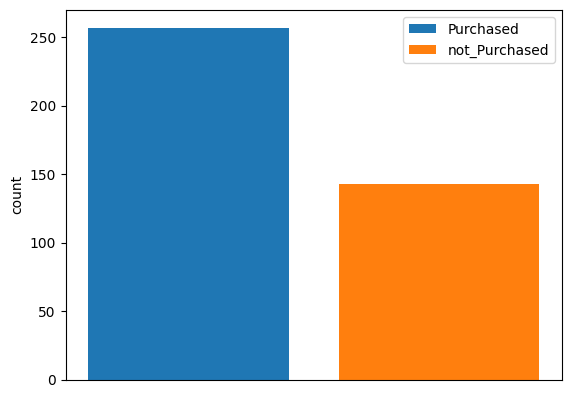

In [10]:
plt.bar(0,purchased,label="Purchased")
plt.bar(1,not_purchased,label="not_Purchased")
plt.xticks([])
plt.ylabel("count")
plt.legend()
plt.show()

In [11]:
x=df.iloc[:,[2,3]]
print(x.head())

   Age  EstimatedSalary
0   19            19000
1   35            20000
2   26            43000
3   27            57000
4   19            76000


In [12]:
x.shape

(400, 2)

In [13]:
y=df["Purchased"]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [14]:
y.shape

(400,)

In [15]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(x)


In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [17]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(320, 2)
(80, 2)
(320,)
(80,)


In [18]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(C=1,solver="liblinear",multi_class="ovr")
lr.fit(x_train,y_train)

LogisticRegression(C=1, multi_class='ovr', solver='liblinear')

In [19]:
pred_lr=lr.predict(x_test)
pred_lr

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [20]:
from sklearn.metrics import accuracy_score
acc_1=accuracy_score(pred_lr,y_test)
acc_1

0.725

In [21]:
from sklearn.metrics import confusion_matrix
confusion_1=confusion_matrix(y_test,pred_lr)
confusion_1

array([[57,  1],
       [21,  1]])

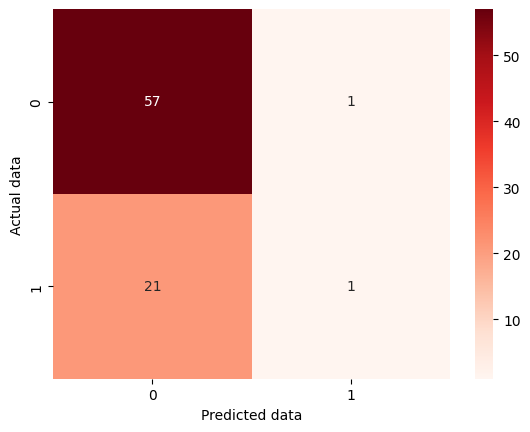

In [22]:
sns.heatmap(confusion_1,annot=True,cmap="Reds")
plt.xlabel("Predicted data")
plt.ylabel("Actual data")
plt.show()

In [23]:
precision_1=metrics.precision_score(y_test,pred_lr)
precision_1


0.5

In [24]:
recall_score_1=metrics.recall_score(y_test,pred_lr)
recall_score_1

0.045454545454545456

In [25]:
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier(criterion="entropy",splitter="best")
dc.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [26]:
pred_dc=dc.predict(x_test)
pred_dc

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1])

In [27]:
acc_dc=accuracy_score(y_test,pred_dc)
acc_dc

0.9

In [28]:
confusion_2=confusion_matrix(pred_dc,y_test)
confusion_2

array([[53,  3],
       [ 5, 19]])

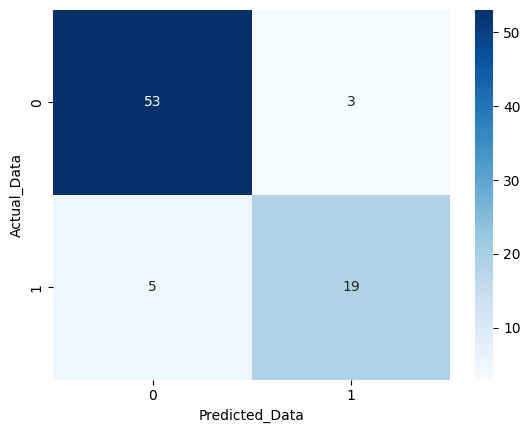

In [29]:
sns.heatmap(confusion_2,annot=True,cmap="Blues")
plt.xlabel("Predicted_Data")
plt.ylabel("Actual_Data")
plt.show()

In [30]:
precision_2=metrics.precision_score(y_test,pred_dc)
precision_2

0.7916666666666666

In [31]:
recall_score_2=metrics.recall_score(y_test,pred_dc)
recall_score_2

0.8636363636363636

In [32]:
from sklearn.ensemble import RandomForestClassifier
forest_classifier=RandomForestClassifier(n_estimators=15, criterion="entropy",max_depth=3)
forest_classifier.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=3, n_estimators=15)

In [33]:
forest_pred=forest_classifier.predict(x_test)
forest_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1])

In [34]:
accuracy_3=accuracy_score(forest_pred,y_test)
accuracy_3


0.95

In [35]:
forest_confusion=confusion_matrix(y_test,forest_pred)
forest_confusion

array([[55,  3],
       [ 1, 21]])

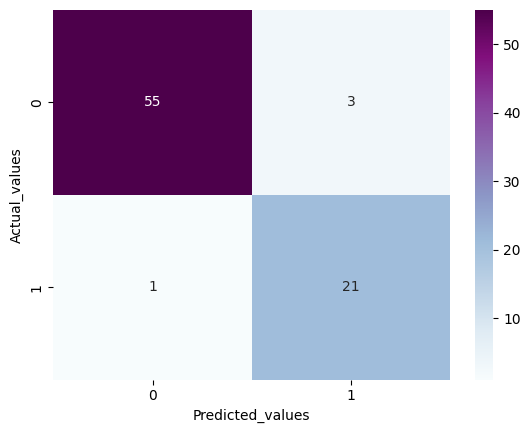

In [36]:
sns.heatmap(forest_confusion,annot=True,cmap="BuPu")
plt.xlabel("Predicted_values")
plt.ylabel("Actual_values")
plt.show()

In [37]:
precision_3=metrics.precision_score(forest_pred,y_test)
precision_3

0.9545454545454546

In [38]:
recall_forest=metrics.recall_score(forest_pred,y_test)
recall_forest

0.875

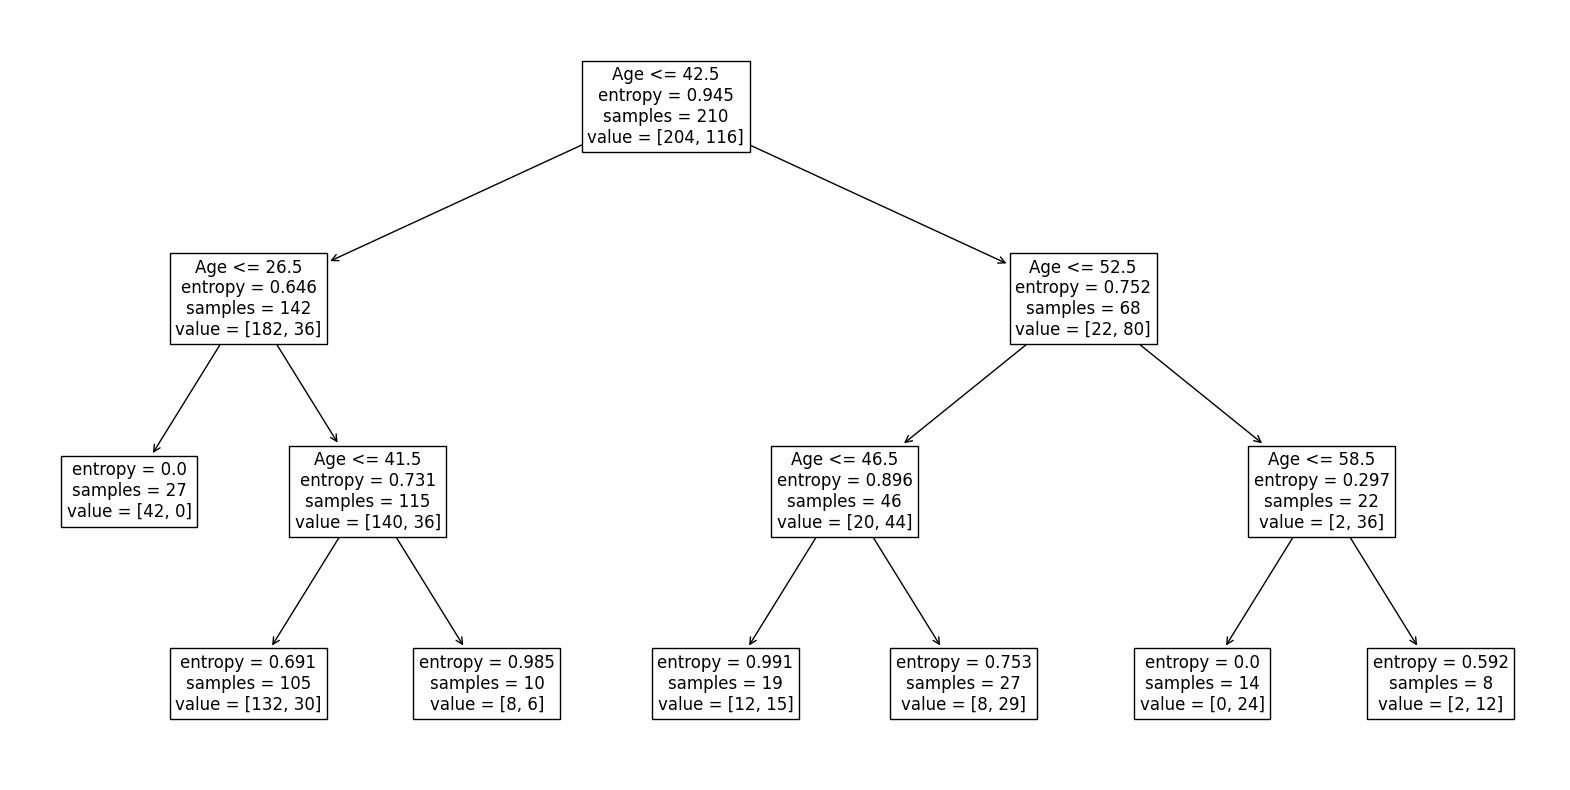

In [39]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(forest_classifier.estimators_[5],feature_names=x_train.columns,fontsize=12)
plt.show()
